In [1]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!
import regionmask

In [2]:
from util.functions import area_latlon
from util.functions import create_masks
from util.functions import split_masks
from util.gamap_colormap import WhGrYlRd

# Create masks

In [3]:
# load data
fname = '/home/msadiq/Desktop/co2/data/outputs/previous/SpeciesConc.201801-04.nc'
ds = xr.open_dataset(fname)
#ds

In [4]:
mask = regionmask.defined_regions.giorgi.mask(ds)

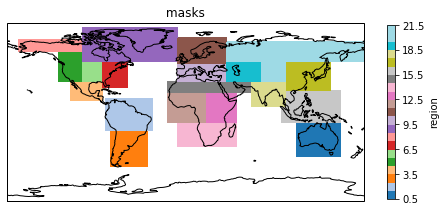

In [5]:
# global map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

low = mask.min()
high = mask.max()
levels = np.arange(low - 0.5, high + 1)

mask.plot(ax=ax, transform=ccrs.PlateCarree(), levels=levels, cmap='tab20', vmax = 21.5, cbar_kwargs={'shrink': 0.8,})
ax.set_title(" masks ")
ax.coastlines();

In [27]:
# get a subset of data, and draw global plot
tag_nm        = 'Tag11'
variable_name = 'SpeciesConc_CO2'+tag_nm # variable name
lev_nm        = 0                     # level
day           = 90                     # day of sim

dr = ds[variable_name].isel(lev=lev_nm,time=0,record=day)*1e6 # unit converted to ppm
# time dimension is redundant
# record tells day of simulations, 1:180, first half year of simulation
#dr

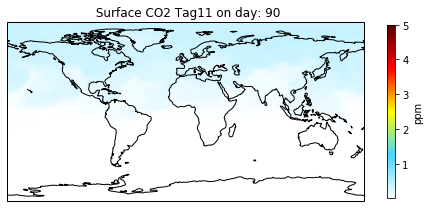

In [28]:
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)
### mapping the variable
dr.plot(ax=ax, transform=ccrs.PlateCarree(), vmax = 5, cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.8, 'label':'ppm'})
ax.set_title(' Surface CO2 ' + tag_nm + ' on day: ' + str(day))
ax.coastlines();

fig.savefig('/home/msadiq/Desktop/co2/data/outputs/previous/' + tag_nm + '.png', dpi=300)

In [29]:
# get regional mean values of the previous variable
dr_180 = ds[variable_name].isel(lev=lev_nm,time=0)*1e6 # unit converted to ppm
co2_regional = dr_180.groupby(mask).mean('stacked_lat_lon')

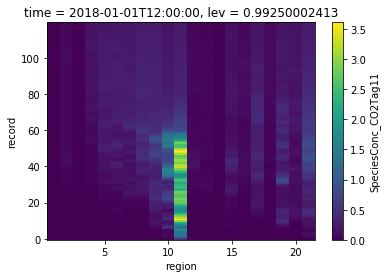

In [30]:
co2_regional.plot()

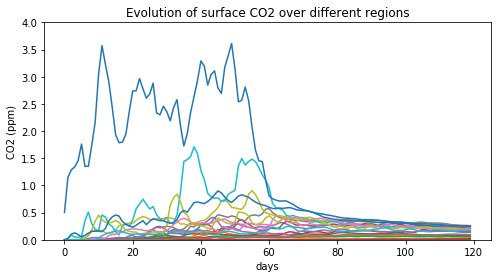

In [31]:
#tmp1=co2_regional.sel(region = 11)*1e6 #ppm
# spaghetti plot for different regions
# shows temporal evolution of surface CO2 concentration
fig = plt.figure(figsize=[8, 4])

for iregion in range(1,22):
    plt.plot(co2_regional.sel(region = iregion), label=iregion)
    plt.ylim(top=4)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=0)  # adjust the bottom leaving top unchanged
    plt.title('Evolution of surface CO2 over different regions')
    plt.ylabel('CO2 (ppm)')
    plt.xlabel('days')
    
fig.savefig('/home/msadiq/Desktop/co2/data/outputs/previous/CO2_evolution.png', dpi=300)

In [ ]:
# extract the abbreviations and the names of the regions from regionmask
abbrevs = regionmask.defined_regions.giorgi[co2_regional.region.values].abbrevs
names = regionmask.defined_regions.giorgi[co2_regional.region.values].names

co2_regional.coords['abbrevs'] = ('region', abbrevs)
co2_regional.coords['names'] = ('region', names)
#co2_regional_surface = co2_regional[1,1,:,:]

In [ ]:
region_tmp = co2_regional.isel(region=11)
region_tmp['SpeciesConc_CO2Tag19'].isel(lev=0)
region_tmp.coords